In [ ]:
#!pip install Pyspark

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
from zipfile import ZipFile

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# ! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# !kaggle datasets download -d ealaxi/paysim1

In [ ]:
# zipext = ZipFile("/content/paysim1.zip")
# zipext.extractall("/content")
# zipext.close()

In [ ]:
df = pd.read_csv("/content/PS_20174392719_1491204439457_log.csv")

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   step            1048575 non-null  int64  
 1   type            1048575 non-null  object 
 2   amount          1048575 non-null  float64
 3   nameOrig        1048575 non-null  object 
 4   oldbalanceOrg   1048575 non-null  float64
 5   newbalanceOrig  1048575 non-null  float64
 6   nameDest        1048575 non-null  object 
 7   oldbalanceDest  1048575 non-null  float64
 8   newbalanceDest  1048575 non-null  float64
 9   isFraud         1048575 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 80.0+ MB


In [ ]:
df['isFraud'].value_counts()

0    1047433
1       1142
Name: isFraud, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
step,1048575.0,NaN,NaN,NaN,26.966174,15.623252,1.0,15.0,20.0,39.0,95.0
type,1048575,5,CASH_OUT,373641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
amount,1048575.0,NaN,NaN,NaN,158666.975527,264940.930363,0.1,12149.065,76343.33,213761.89,10000000.0
nameOrig,1048575,1048317,C1214450722,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceOrg,1048575.0,NaN,NaN,NaN,874009.544348,2971750.560051,0.0,0.0,16002.0,136642.02,38900000.0
newbalanceOrig,1048575.0,NaN,NaN,NaN,893808.898031,3008271.333427,0.0,0.0,0.0,174599.99,38900000.0
nameDest,1048575,449635,C985934102,98,NaN,NaN,NaN,NaN,NaN,NaN,NaN
oldbalanceDest,1048575.0,NaN,NaN,NaN,978160.049276,2296780.392481,0.0,0.0,126377.21,915923.475,42100000.0
newbalanceDest,1048575.0,NaN,NaN,NaN,1114197.96847,2416593.123013,0.0,0.0,218260.36,1149807.51,42200000.0
isFraud,1048575.0,NaN,NaN,NaN,0.001089,0.032984,0.0,0.0,0.0,0.0,1.0


In [ ]:
num_var = []
for i in df.columns:
  if df[i].dtype == 'int' or df[i].dtype =='float':
    num_var.append(i)

column step


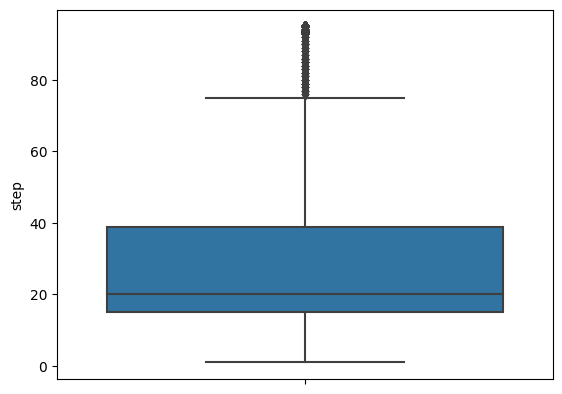

 
column amount


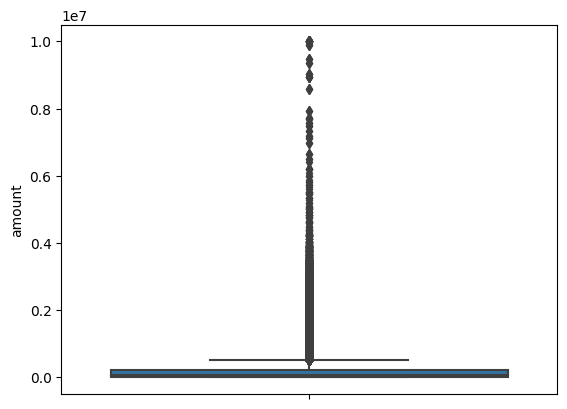

 
column oldbalanceOrg


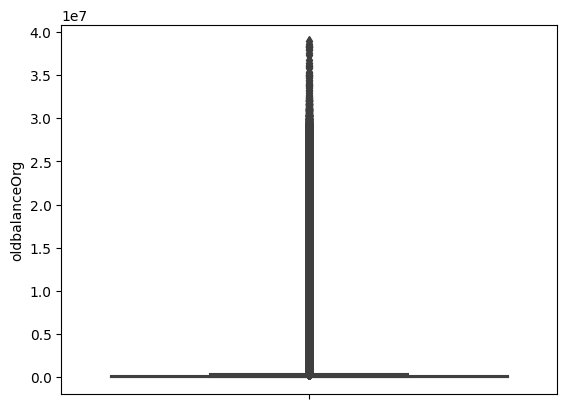

 
column newbalanceOrig


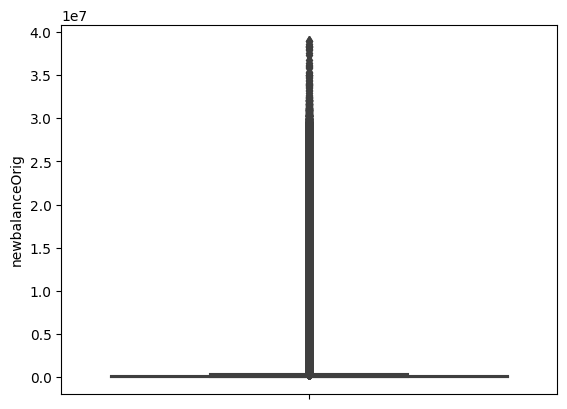

 
column oldbalanceDest


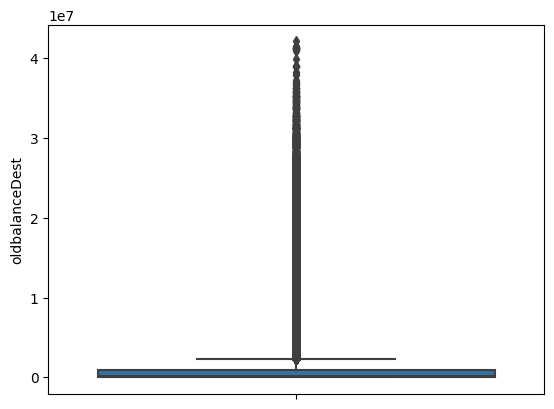

 
column newbalanceDest


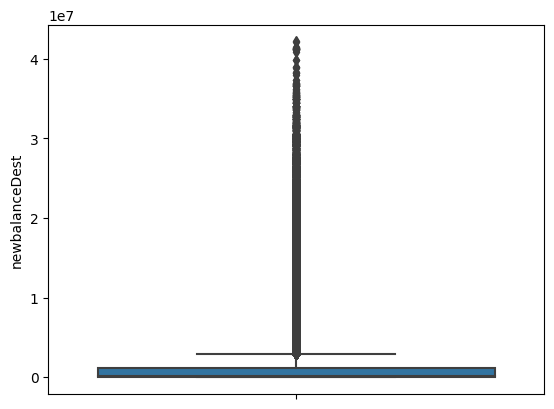

 
column isFraud


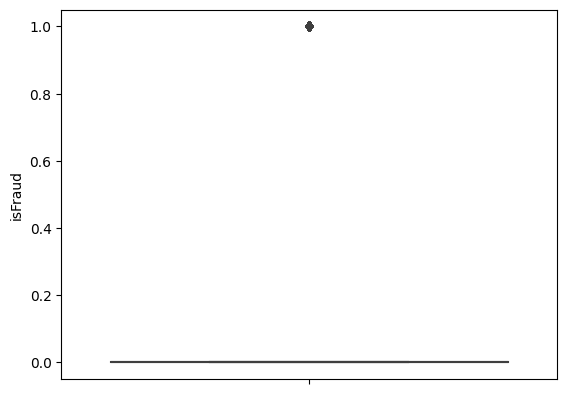

In [ ]:
for j in num_var:
  print('column', j)
  fig1 = sn.boxplot(y= j, data = df)
  plt.show()
  print(' ')

column step


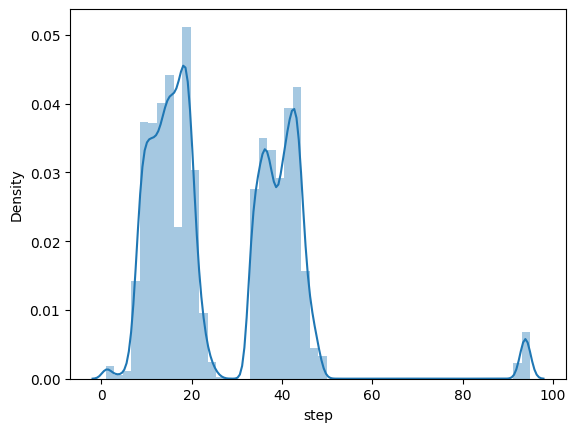


column amount


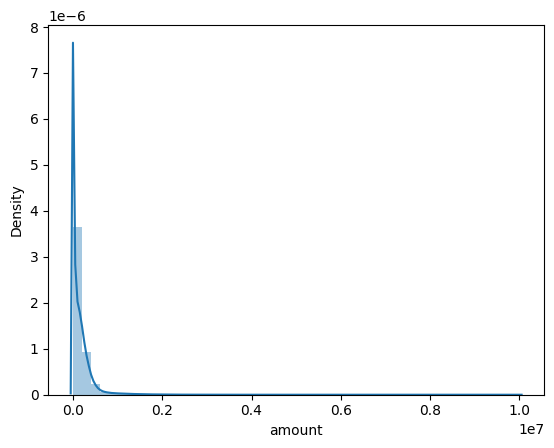


column oldbalanceOrg


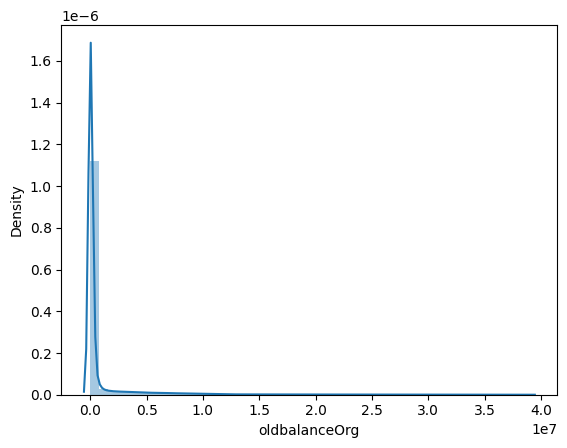


column newbalanceOrig


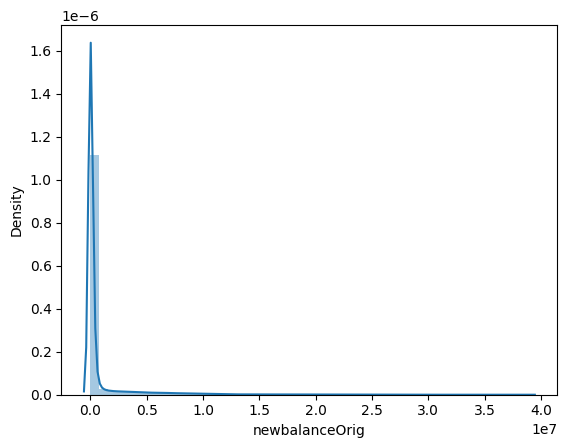


column oldbalanceDest


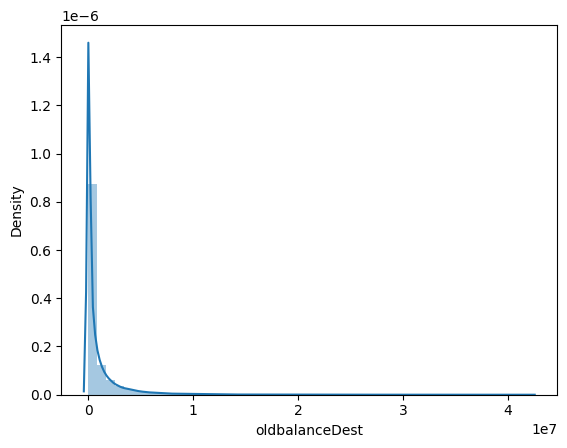


column newbalanceDest


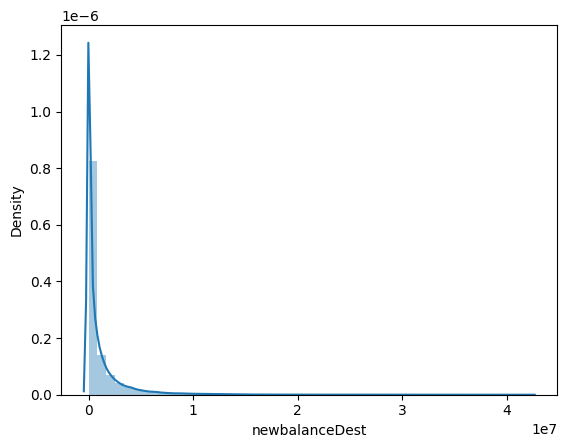


column isFraud


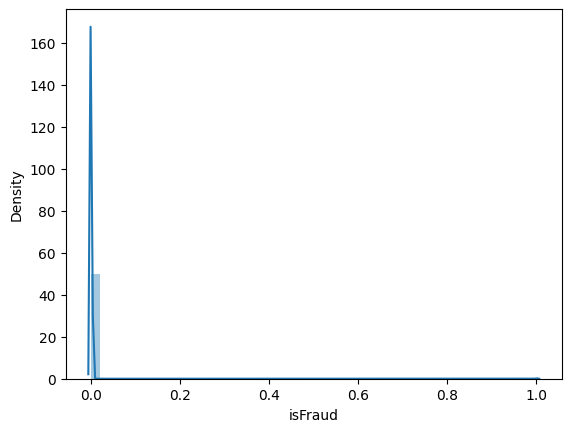

In [ ]:
for j in num_var:
  print('column', j)
  fig2 = sn.distplot(df[j])
  plt.show()
  print('')

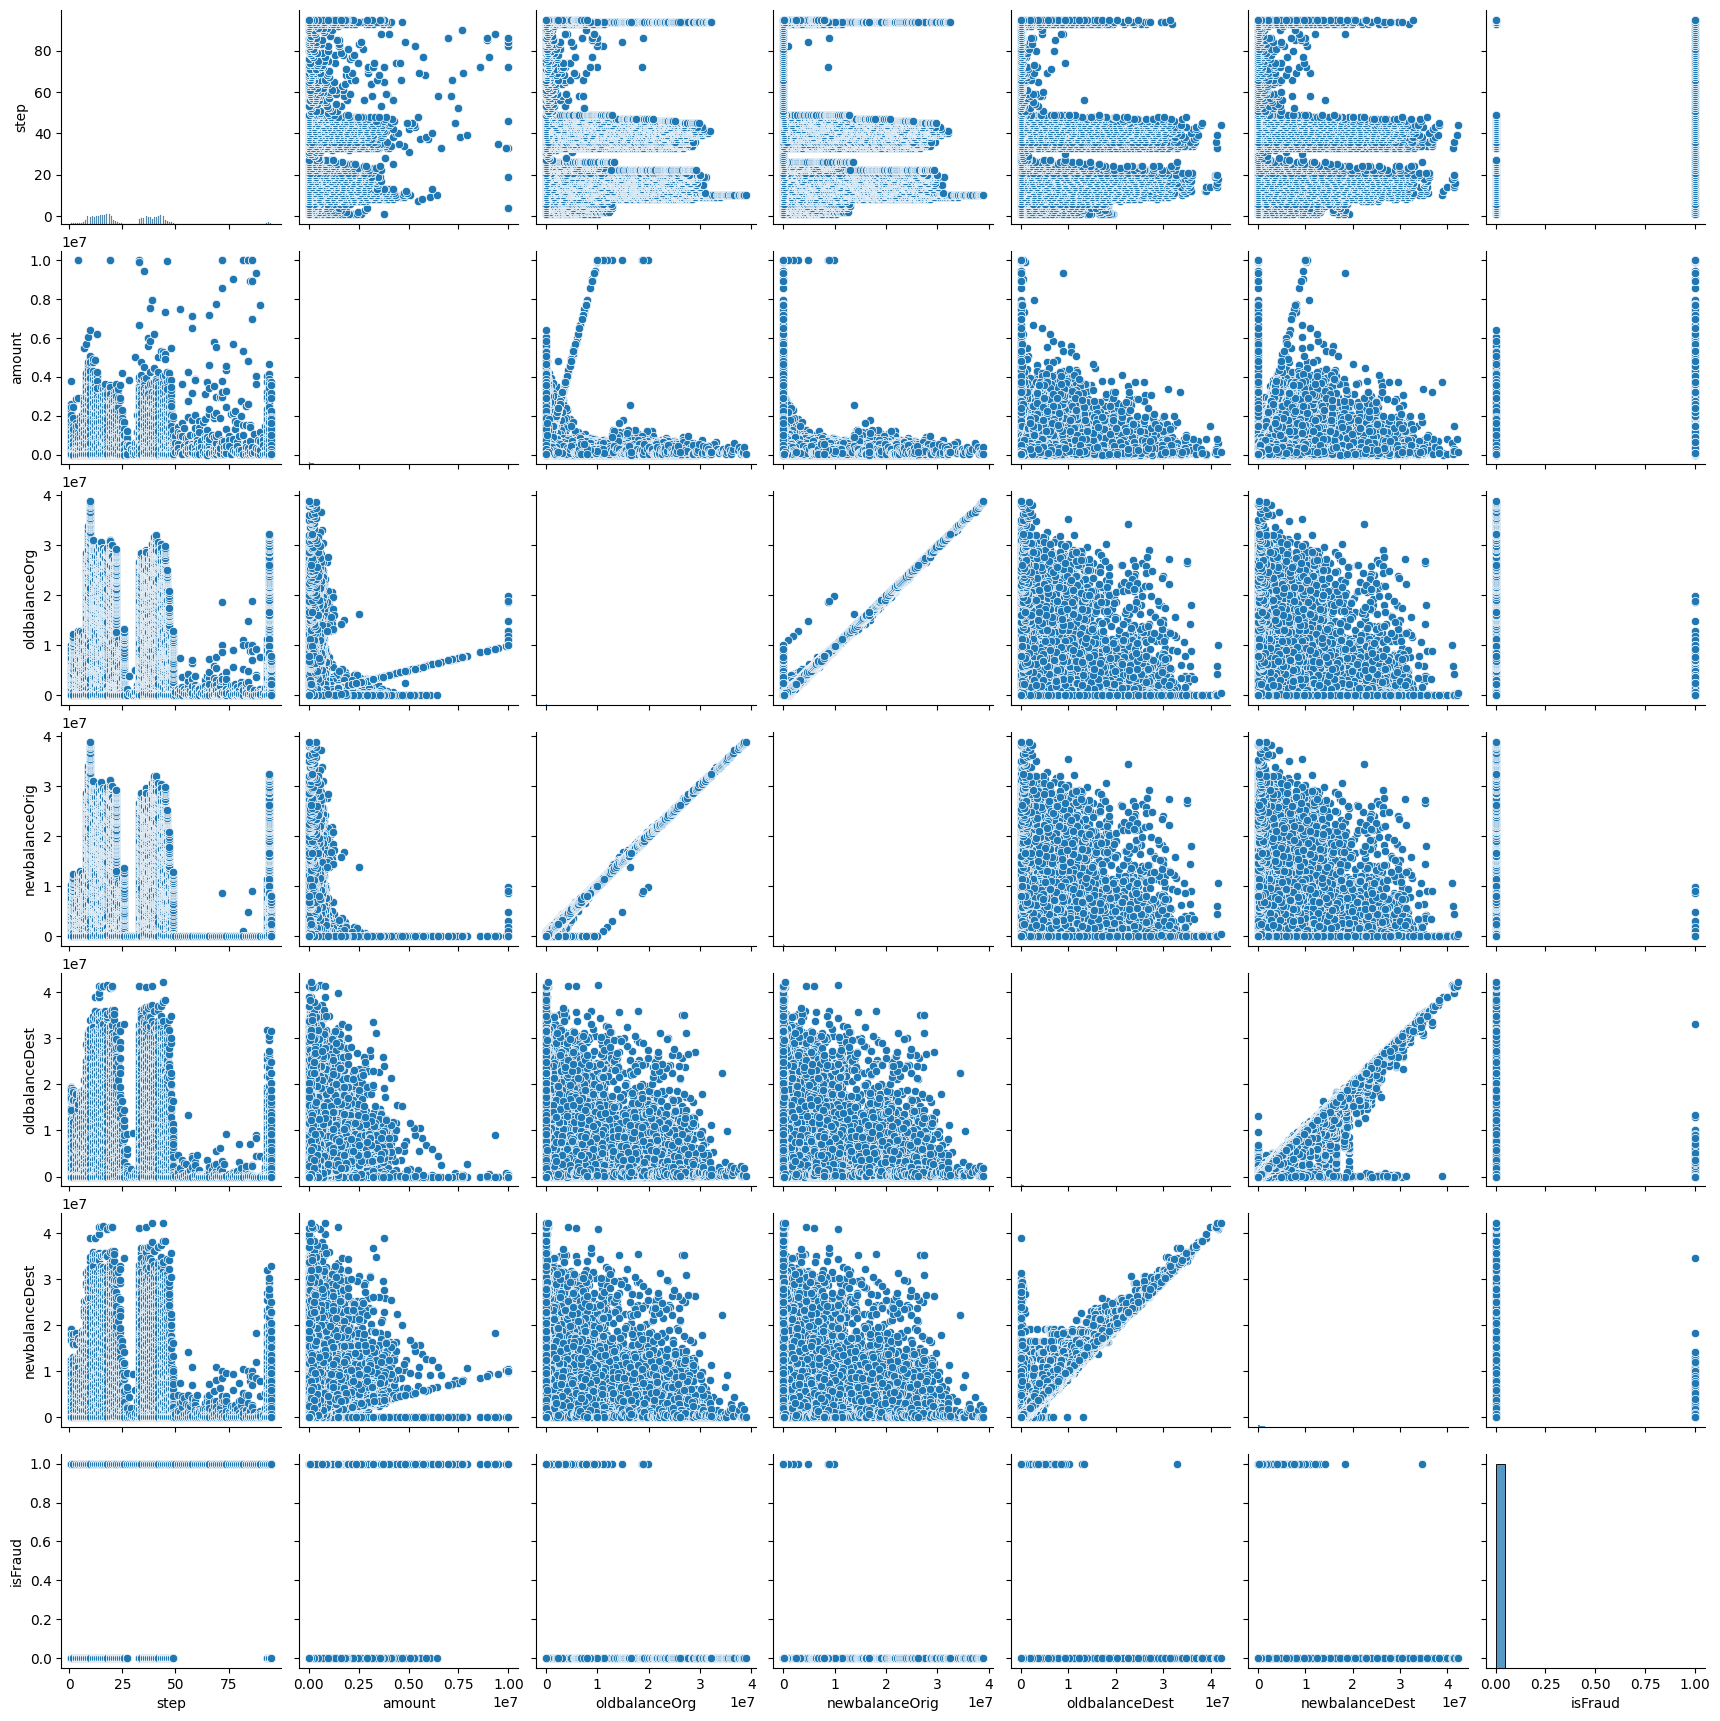

In [ ]:
fig3 = sn.pairplot(df,palette = ["#8000ff","#da8829"])
plt.show()

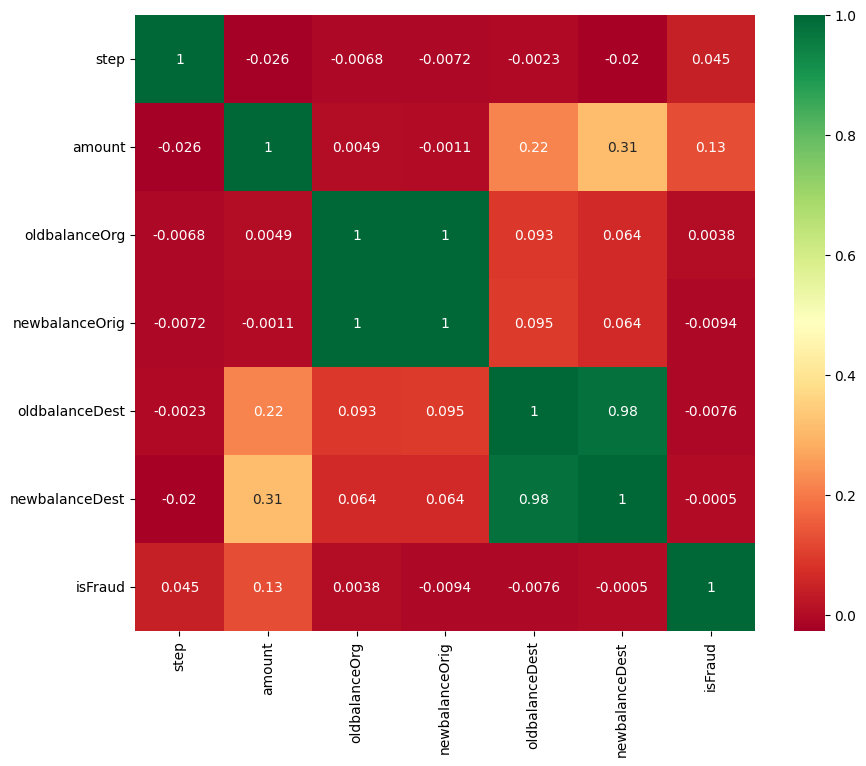

In [ ]:
plt.figure(figsize=(10,8))
fig4=sn.heatmap(df.corr(), annot= True, cmap='RdYlGn')

In [ ]:
Q1 = df.step.quantile(0.25)
Q3 = df.step.quantile(0.75)

IQR = Q3 - Q1

lower_limit = Q1-1.5*IQR
Upper_limit = Q3+1.5*IQR

In [ ]:
outliers_count_step = len(df[(df['step'] > Upper_limit) | (df['step'] < lower_limit)])

print("Number of outliers:", outliers_count_step)

Number of outliers: 17974


In [ ]:
Q1 = df.amount.quantile(0.25)
Q3 = df.amount.quantile(0.75)

outliers_count_amount = len(df[(df['amount'] > Upper_limit) | (df['amount'] < lower_limit)])

print("Number of outliers:", outliers_count_amount)

Number of outliers: 1046718


In [ ]:
outlier_indices_step = np.where((df['step'] < lower_limit) | (df['step'] > Upper_limit))

In [ ]:
for col, indices in zip(df.columns, outlier_indices_step):
    print(f"Outliers in '{col}': {indices}")

Outliers in 'step': [1030601 1030602 1030603 ... 1048572 1048573 1048574]


In [ ]:
outlier_indices_amount= np.where((df['amount'] < lower_limit) | (df['amount'] > Upper_limit))

for col, indices in zip(df.columns, outlier_indices_amount):
    print(f"Outliers in '{col}': {indices}")

Outliers in 'step': [      0       1       2 ... 1048572 1048573 1048574]


In [ ]:
Q1 = df.oldbalanceOrg.quantile(0.25)
Q3 = df.oldbalanceOrg.quantile(0.75)

outliers_count_oldbalanceOrg = len(df[(df['oldbalanceOrg'] > Upper_limit) | (df['oldbalanceOrg'] < lower_limit)])

print("Number of outliers:", outliers_count_oldbalanceOrg)


outlier_indices_oldbalanceOrg= np.where((df['oldbalanceOrg'] < lower_limit) | (df['oldbalanceOrg'] > Upper_limit))

for col, indices in zip(df.columns, outlier_indices_oldbalanceOrg):
    print(f"Outliers in '{col}': {indices}")

Number of outliers: 702518
Outliers in 'step': [      0       1       2 ... 1048572 1048573 1048574]


In [ ]:
Q1 = df.newbalanceDest.quantile(0.25)
Q3 = df.newbalanceDest.quantile(0.75)

outliers_count_newbalanceDest = len(df[(df['newbalanceDest'] > Upper_limit) | (df['newbalanceDest'] < lower_limit)])

print("Number of outliers:", outliers_count_newbalanceDest)


outlier_indices_newbalanceDest= np.where((df['newbalanceDest'] < lower_limit) | (df['newbalanceDest'] > Upper_limit))

for col, indices in zip(df.columns, outlier_indices_newbalanceDest):
    print(f"Outliers in '{col}': {indices}")

Number of outliers: 641612
Outliers in 'step': [      9      10      15 ... 1048565 1048567 1048570]


In [ ]:
Q1 = df.oldbalanceDest.quantile(0.25)
Q3 = df.oldbalanceDest.quantile(0.75)

outliers_count_oldbalanceDest = len(df[(df['oldbalanceDest'] > Upper_limit) | (df['oldbalanceDest'] < lower_limit)])

print("Number of outliers:", outliers_count_oldbalanceDest)


outlier_indices_oldbalanceDest= np.where((df['oldbalanceDest'] < lower_limit) | (df['oldbalanceDest'] > Upper_limit))

for col, indices in zip(df.columns, outlier_indices_oldbalanceDest):
    print(f"Outliers in '{col}': {indices}")

Number of outliers: 611145
Outliers in 'step': [      3       9      10 ... 1048565 1048567 1048570]


In [ ]:
Q1 = df.newbalanceDest.quantile(0.25)
Q3 = df.newbalanceDest.quantile(0.75)

outliers_count_newbalanceDest = len(df[(df['newbalanceDest'] > Upper_limit) | (df['newbalanceDest'] < lower_limit)])

print("Number of outliers:", outliers_count_newbalanceDest)


outlier_indices_newbalanceDest= np.where((df['newbalanceDest'] < lower_limit) | (df['newbalanceDest'] > Upper_limit))

for col, indices in zip(df.columns, outlier_indices_newbalanceDest):
    print(f"Outliers in '{col}': {indices}")

Number of outliers: 641612
Outliers in 'step': [      9      10      15 ... 1048565 1048567 1048570]


In [ ]:
Q1 = df.isFraud.quantile(0.25)
Q3 = df.isFraud.quantile(0.75)

outliers_count_isFraud = len(df[(df['isFraud'] > Upper_limit) | (df['isFraud'] < lower_limit)])

print("Number of outliers:", outliers_count_isFraud)


outlier_indices_isFraud= np.where((df['isFraud'] < lower_limit) | (df['isFraud'] > Upper_limit))

for col, indices in zip(df.columns, outlier_indices_isFraud):
    print(f"Outliers in '{col}': {indices}")

Number of outliers: 0
Outliers in 'step': []


In [ ]:
df.drop('nameOrig', axis = 1, inplace = True)
df.drop('nameDest', axis = 1, inplace = True)

In [ ]:
!pip install imblearn

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.combine import SMOTETomek
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import LabelEncoder

In [ ]:
os = SMOTETomek(random_state = 42)
rs = RobustScaler()
le = LabelEncoder()

In [ ]:
df1 = pd.get_dummies(df, columns = ['type'], drop_first=True)

In [ ]:
df1.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,0,1,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,0,1,0
2,1,181.00,181.0,0.00,0.0,0.0,1,0,0,0,1
3,1,181.00,181.0,0.00,21182.0,0.0,1,1,0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,0,1,0


In [ ]:
df1.drop('newbalanceOrig', axis = 1, inplace = True)
df1.drop('oldbalanceDest', axis = 1, inplace = True)
df1.drop('newbalanceDest', axis = 1, inplace = True)

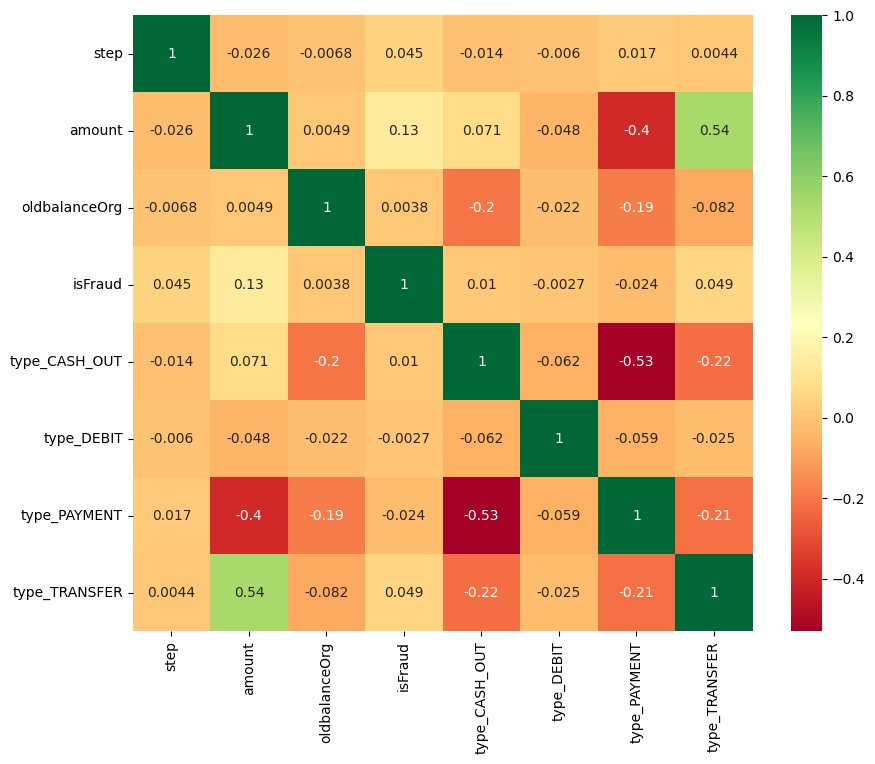

In [ ]:
plt.figure(figsize=(10,8))
fig5=sn.heatmap(df1.corr(), annot= True, cmap='RdYlGn')

In [ ]:
X = df1.drop('isFraud', axis = 1)
Y = df1['isFraud']

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 42)

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 838860 entries, 408561 to 121958
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   step           838860 non-null  int64  
 1   amount         838860 non-null  float64
 2   oldbalanceOrg  838860 non-null  float64
 3   type_CASH_OUT  838860 non-null  uint8  
 4   type_DEBIT     838860 non-null  uint8  
 5   type_PAYMENT   838860 non-null  uint8  
 6   type_TRANSFER  838860 non-null  uint8  
dtypes: float64(2), int64(1), uint8(4)
memory usage: 28.8 MB


In [ ]:
Y_train.head()

408561    0
70143     0
708782    0
572694    0
774181    0
Name: isFraud, dtype: int64

In [ ]:
columns = X_train.columns

os_data_X,os_data_y=os.fit_resample(X_train,Y_train)
os_data_X = pd.DataFrame(data=os_data_X, columns=columns)
os_data_y = pd.DataFrame(data=os_data_y)

In [ ]:
#from imblearn.over_sampling import ADASYN

In [ ]:
os_data_X.shape

(1664176, 7)

In [ ]:
os_data_y.value_counts()

isFraud
0          832088
1          832088
dtype: int64

In [ ]:
scaled_df =pd.DataFrame(rs.fit_transform(os_data_X), columns = os_data_X.columns)

In [ ]:
scaledtest_df =pd.DataFrame(rs.transform(X_test), columns = X_test.columns)

In [ ]:
 scaled_df.head()

,step,amount,oldbalanceOrg,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.56250,0.268070,-0.152336,1.0,0.0,0.0,0.0
1,-0.84375,-0.358540,-0.142500,0.0,0.0,1.0,0.0
2,0.03125,0.672304,0.561486,1.0,0.0,0.0,0.0
3,-0.37500,-0.335544,-0.150963,0.0,0.0,1.0,0.0
4,0.09375,-0.333144,-0.152336,0.0,0.0,1.0,0.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier


In [ ]:
lor = LogisticRegression()
dt = DecisionTreeClassifier()
rfm = RandomForestClassifier()
svc = SVC()
gnb = GaussianNB()
knn = KNeighborsClassifier()

In [ ]:
lor_model = lor.fit(scaled_df,os_data_y)

In [ ]:
y_pred=lor.predict(scaledtest_df)

In [ ]:
y_predtrain = lor.predict(scaled_df)

In [ ]:
from sklearn import metrics
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score,accuracy_score,roc_curve

In [ ]:
accuracy_score(Y_test,y_pred)

0.82573969434709

In [ ]:
y_predtrain = lor.predict(scaled_df)

accuracy_score(os_data_y, y_predtrain)

0.8272592562325138

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,roc_curve,roc_auc_score

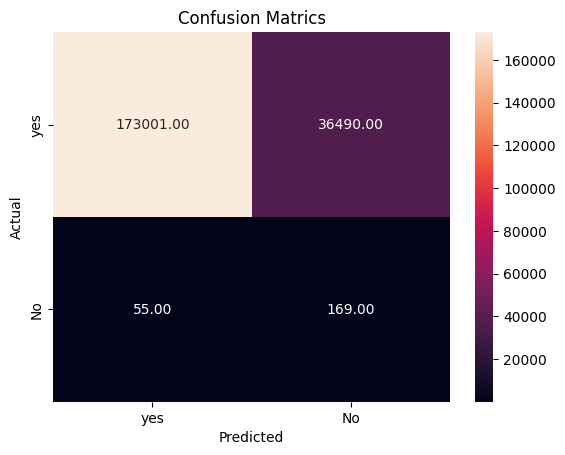

In [ ]:
cm = confusion_matrix(Y_test,y_pred)
cm = sn.heatmap(confusion_matrix(Y_test,y_pred),annot = True,fmt = '.2f',xticklabels=["yes","No"],yticklabels=["yes","No"])
plt.title("Confusion Matrics")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.83      0.90    209491
           1       0.00      0.75      0.01       224

    accuracy                           0.83    209715
   macro avg       0.50      0.79      0.46    209715
weighted avg       1.00      0.83      0.90    209715



In [ ]:
fpr, tpr, _ = roc_curve(Y_test,y_pred)

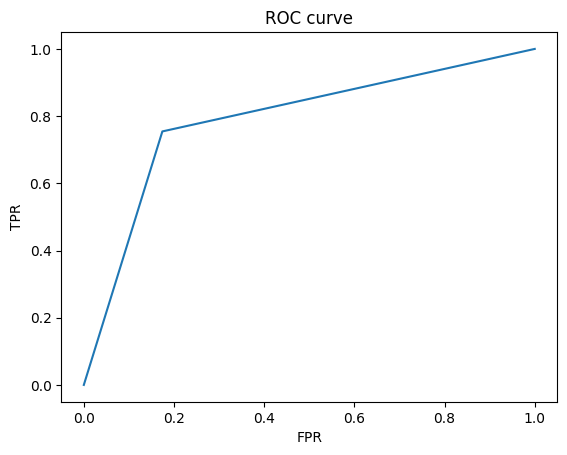

In [ ]:
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.show()

In [ ]:
roc_auc_score(Y_test,y_pred)

0.7901400959434329

In [ ]:
dt_model = dt.fit(scaled_df,os_data_y)

In [ ]:
dt_ypred=dt.predict(scaledtest_df)

In [ ]:
accuracy_score(Y_test,dt_ypred)

0.9955081896860024

In [ ]:
dty_predtrain = dt.predict(scaled_df)

accuracy_score(os_data_y, dty_predtrain)

1.0

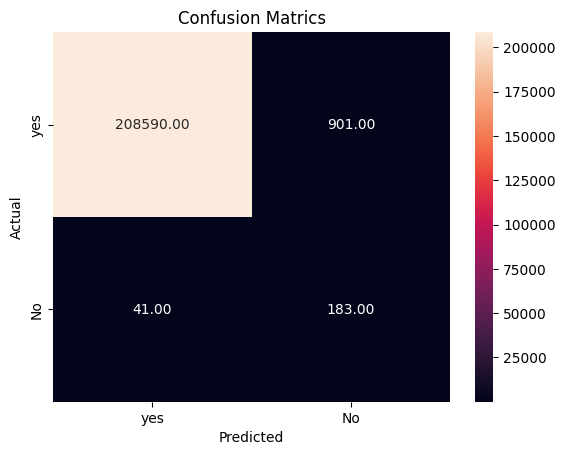

In [ ]:
cm = confusion_matrix(Y_test,dt_ypred)
cm = sn.heatmap(confusion_matrix(Y_test,dt_ypred),annot = True,fmt = '.2f',xticklabels=["yes","No"],yticklabels=["yes","No"])
plt.title("Confusion Matrics")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test, dt_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.17      0.82      0.28       224

    accuracy                           1.00    209715
   macro avg       0.58      0.91      0.64    209715
weighted avg       1.00      1.00      1.00    209715



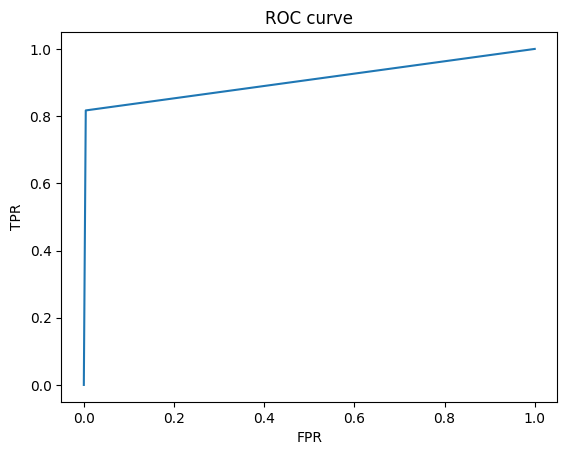

In [ ]:
fpr, tpr, _ = roc_curve(Y_test,dt_ypred)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.show()

In [ ]:
roc_auc_score(Y_test,dt_ypred)

0.9063316924797996

In [ ]:
rfm_model = rfm.fit(scaled_df,os_data_y)

In [ ]:
rfm_ypred=dt.predict(scaledtest_df)

In [ ]:
accuracy_score(Y_test,rfm_ypred)

0.9955081896860024

In [ ]:
rfmy_predtrain = rfm.predict(scaled_df)

accuracy_score(os_data_y, rfmy_predtrain)

0.9999981973060542

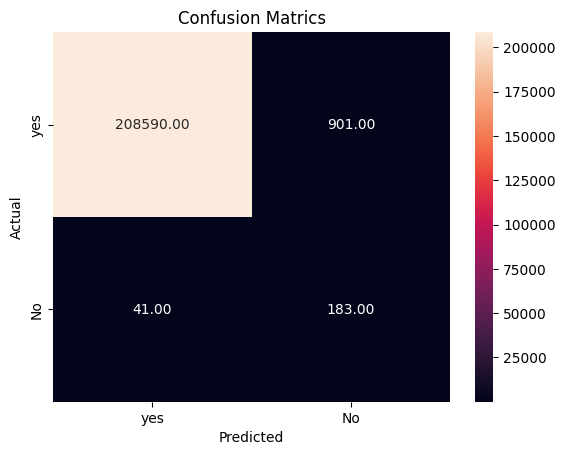

In [ ]:
cm = confusion_matrix(Y_test,rfm_ypred)
cm = sn.heatmap(confusion_matrix(Y_test,rfm_ypred),annot = True,fmt = '.2f',xticklabels=["yes","No"],yticklabels=["yes","No"])
plt.title("Confusion Matrics")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test, rfm_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.17      0.82      0.28       224

    accuracy                           1.00    209715
   macro avg       0.58      0.91      0.64    209715
weighted avg       1.00      1.00      1.00    209715



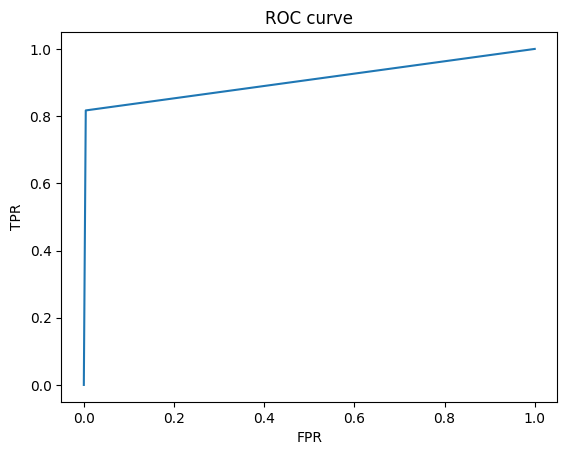

In [ ]:
fpr, tpr, _ = roc_curve(Y_test,rfm_ypred)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.show()

In [ ]:
roc_auc_score(Y_test,rfm_ypred)

0.9063316924797996

In [ ]:
# svc_model = svc.fit(scaled_df,Y_train)

In [ ]:
# svc_ypred=dt.predict(X_test)

In [ ]:
# accuracy_score(Y_test,svc_ypred)

In [ ]:
# cm = confusion_matrix(Y_test,svc_ypred)
# cm = sn.heatmap(confusion_matrix(Y_test,svc_ypred),annot = True,fmt = '.2f',xticklabels=["yes","No"],yticklabels=["yes","No"])
# plt.title("Confusion Matrics")
# plt.xlabel("Predicted")
# plt.ylabel("Actual")
# plt.show()

In [ ]:
# print(classification_report(Y_test, svc_ypred))

In [ ]:
# fpr, tpr, _ = roc_curve(Y_test,svc_ypred)

# plt.xlabel('FPR')
# plt.ylabel('TPR')
# plt.title('ROC curve')
# plt.plot(fpr, tpr)
# plt.show()

In [ ]:
gnb_model = gnb.fit(scaled_df,os_data_y)

In [ ]:
gnb_ypred=gnb.predict(scaledtest_df)

In [ ]:
accuracy_score(Y_test,gnb_ypred)

0.352559425887514

In [ ]:
gnby_predtrain = gnb.predict(scaled_df)

accuracy_score(os_data_y, gnby_predtrain)

0.677417532760958

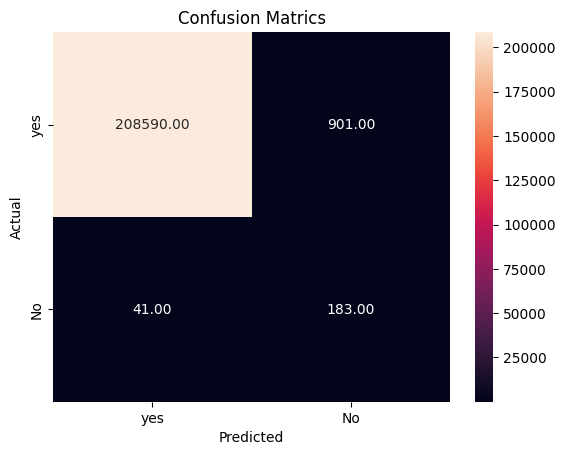

In [ ]:
cm = confusion_matrix(Y_test,gnb_ypred)
cm = sn.heatmap(confusion_matrix(Y_test,gnb_ypred),annot = True,fmt = '.2f',xticklabels=["yes","No"],yticklabels=["yes","No"])
plt.title("Confusion Matrics")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test, gnb_ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.17      0.82      0.28       224

    accuracy                           1.00    209715
   macro avg       0.58      0.91      0.64    209715
weighted avg       1.00      1.00      1.00    209715



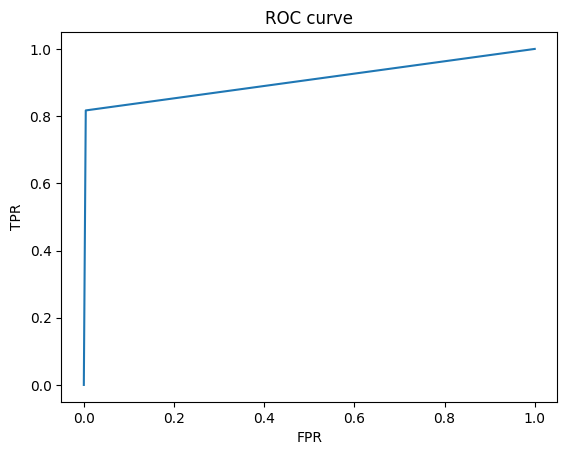

In [ ]:
fpr, tpr, _ = roc_curve(Y_test,gnb_ypred)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.show()

In [ ]:
roc_auc_score(Y_test,gnb_ypred)

0.9063316924797996

In [ ]:
knn_model = knn.fit(scaled_df,os_data_y)

In [ ]:
knn_ypred=knn.predict(scaledtest_df)

In [ ]:
accuracy_score(Y_test,knn_ypred)

0.9887800109672651

In [ ]:
knny_predtrain = knn.predict(scaled_df)

accuracy_score(os_data_y, knny_predtrain)

0.9950714347520935

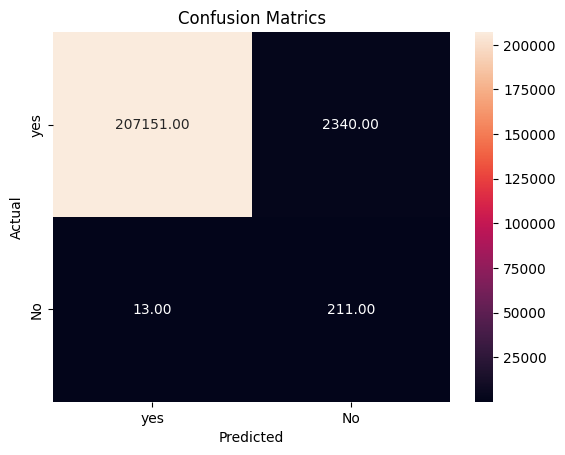

In [ ]:
cm = confusion_matrix(Y_test,knn_ypred)
cm = sn.heatmap(confusion_matrix(Y_test,knn_ypred),annot = True,fmt = '.2f',xticklabels=["yes","No"],yticklabels=["yes","No"])
plt.title("Confusion Matrics")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [ ]:
print(classification_report(Y_test, knn_ypred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99    209491
           1       0.08      0.94      0.15       224

    accuracy                           0.99    209715
   macro avg       0.54      0.97      0.57    209715
weighted avg       1.00      0.99      0.99    209715



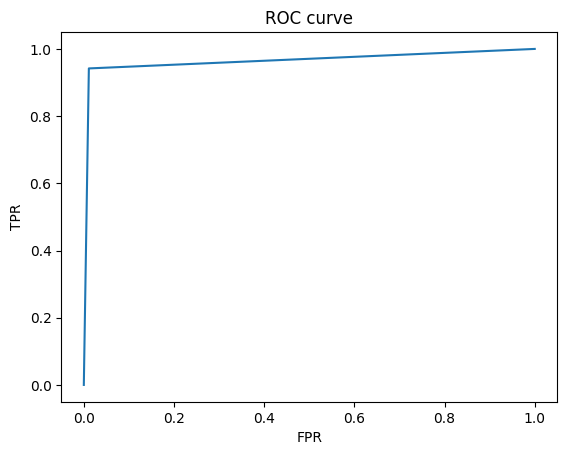

In [ ]:
fpr, tpr, _ = roc_curve(Y_test,knn_ypred)

plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve')
plt.plot(fpr, tpr)
plt.show()

In [ ]:
roc_auc_score(Y_test,knn_ypred)

0.9653971773932326

In [ ]:
X_train.head()

,step,amount,oldbalanceOrg,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
408561,18,268368.06,0.00,1,0,0,0
70143,9,3834.08,6654.43,0,0,1,0
708782,37,439022.46,482902.96,1,0,0,0
572694,24,13542.02,929.00,0,0,1,0
774181,39,14555.34,0.00,0,0,1,0


In [ ]:
def Pred(step,amount,oldbalanceOrg,Type):
  if Type == "CASH_OUT":
    inp = [step,amount,oldbalanceOrg,1,0,0,0]
  elif Type == "DEBIT":
    inp = [step,amount,oldbalanceOrg,0,1,0,0]
  elif Type == "PAYMENT":
    inp = [step,amount,oldbalanceOrg,0,0,1,0]
  elif Type == "TRANSFER":
    inp = [step,amount,oldbalanceOrg,0,0,0,1]
  else:
    inp = [step,amount,oldbalanceOrg,0,0,0,0]

  inp1 =np.array(inp)
  inp1 = inp1.reshape(1,-1)
  inp1 = rs.fit_transform(inp1)
  pred = dt.predict(inp1)

  if pred == 1:
    print("Fraud")
  else:
    print("not Fraud")


In [ ]:
Pred(760,10839.64,180136,"TRANSFER")

not Fraud


In [ ]:
scaled_df.head()

,step,amount,oldbalanceOrg,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,-0.56250,0.268070,-0.152336,1.0,0.0,0.0,0.0
1,-0.84375,-0.358540,-0.142500,0.0,0.0,1.0,0.0
2,0.03125,0.672304,0.561486,1.0,0.0,0.0,0.0
3,-0.37500,-0.335544,-0.150963,0.0,0.0,1.0,0.0
4,0.09375,-0.333144,-0.152336,0.0,0.0,1.0,0.0


In [ ]:
Y_train.head()

408561    0
70143     0
708782    0
572694    0
774181    0
Name: isFraud, dtype: int64